Bioinformatics Final Project Team 12

In [1]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_classif

c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Data Preparation

In [2]:
raw_counts = pd.read_csv(r'D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\normalized_gene_counts_twenty_subset.csv', index_col=0)
raw_counts = raw_counts.T
metadata_file = r"D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\metadata.csv"
metadata = pd.read_csv(metadata_file, sep=',')
df = pd.merge(raw_counts, metadata, left_index=True, right_on='Sample_ID')
df = df.drop(['Sample_ID','Clade', 'Dominant' ],axis=1)
df['Host'] = (df['Host']=='OANN').astype(int)
y = df['Host']
X = df.drop(['Host'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=41)

SVM : The Best Performing Algorithm in our project

No of Components: 13
Support Vector Machine Test Set Accuracy: 0.8888888888888888
Error Rate: 0.1111
Top 2 Significant Genes: ['C0H419', 'O05496']
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



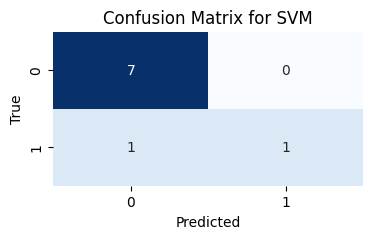

In [3]:
svm = SVC(kernel='linear',degree=3)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
svm.fit(X_train, y_train)
print("No of Components:", svm.support_vectors_.shape[0])
coefficients = svm.coef_[0]
gene_importance = sorted(zip(X_train.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)
top_genes = gene_importance[:2]
y_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Test Set Accuracy:", test_accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()
print(f"Error Rate: {error_rate:.4f}")
print("Top 2 Significant Genes:", [f"{gene}" for gene, coefficient in top_genes])
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()
gene_importance_df = pd.DataFrame(gene_importance, columns=['Gene', 'Coefficient'])
gene_importance_sorted = gene_importance_df.iloc[(-gene_importance_df['Coefficient'].abs()).argsort()]
top_percentage = 0.5
num_genes = int(len(gene_importance_sorted) * top_percentage)
top_genes = gene_importance_sorted.head(num_genes)
top_genes.to_csv('top_genes_svm.csv', index=False)

How Many Genes/Components Are Obtained/Required Significant Results?
 13

What is the Error Rate of These Algorithms?
 0.1111

What are two genes that were signficiantly correlated to your problem?
To evaluate the biological relevance of the Uncharacterized UDP-glucosyltransferase YdhE and Biotin/Lipoyl Attachment Protein from Bacillus subtilis in relation to Cladacopium and its host organism, we need to consider their potential functions and how these might relate to the symbiotic relationship:

1. *Uncharacterized UDP-Glucosyltransferase YdhE - Bacillus subtilis*:
   - *Function*: While specific functions are not detailed, UDP-glucosyltransferases generally play roles in the modification of molecules by adding glucose units. This can be important in various biological processes including metabolism, detoxification, and cellular signaling.
   - *Relevance to Cladacopium*: Although the exact function in Bacillus subtilis is not characterized, the general role of glucosyltransferases in metabolism could be relevant. Metabolic processes are crucial in the symbiotic relationship between Cladacopium and its coral host, especially in terms of nutrient exchange and adaptation to environmental stressors.

2. *Biotin/Lipoyl Attachment Protein - Bacillus subtilis*:
   - *Function*: This protein is involved in the attachment of biotin or lipoic acid to enzymes that require these molecules as cofactors. Biotin and lipoic acid play important roles in critical metabolic pathways.
   - *Relevance to Cladacopium*: Enzymatic cofactors are vital for the functioning of many metabolic pathways. In the context of Cladacopium, understanding how essential cofactors are attached to enzymes can provide insights into the metabolic efficiency and adaptability of the symbiotic algae, especially under varying environmental conditions.

What can we infer about this dataset based on these results?
- *Comparative Metabolic Studies*: Studying these proteins in bacteria can offer insights into fundamental metabolic processes that might also be present in Cladacopium or its host, albeit with species-specific differences.
- *Understanding Symbiotic Interactions*: The efficiency of metabolic processes, such as those potentially influenced by these proteins, is crucial for the health and stability of the Cladacopium-coral symbiosis. Efficient nutrient use and metabolic flexibility can be key to the resilience of the symbiotic relationship.
- *Support Vector Machine (SVM) Analysis Context*: The SVM algorithm identified these proteins as significant, suggesting they might have distinctive roles or features within the dataset. This could indicate that the metabolic processes they are involved in are important in differentiating between certain biological states or conditions relevant to Cladacopium.

In summary, while the direct relevance of these specific proteins from Bacillus subtilis to Cladacopium and its host might not be immediately clear, the metabolic processes they are involved in are fundamental and could provide valuable comparative insights into the metabolic aspects of the Cladacopium-host symbiosis. Further research specifically targeting Cladacopium and its host is required to establish more direct connections.



Logistic Regression



Number of Componenets: 20
Logistic Regression Test Set Accuracy: 0.8888888888888888
Error Rate: 0.1111
Top 2 Features:
12    C0H419
8     Q27960
Name: Feature, dtype: object
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



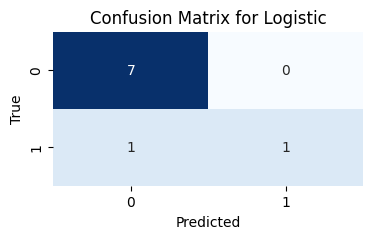

In [4]:
(print("Number of Componenets: 20"))
lr = LogisticRegression(max_iter=1000,penalty='l2')
k = 10  # Adjust this value based on the desired number of top features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Set Accuracy:", test_accuracy)
lr.fit(X_train, y_train)
coefficients = lr.coef_[0]
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)
top_features = sorted_coefficients.head(2)
conf_matrix = confusion_matrix(y_test, y_pred)
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()
print(f"Error Rate: {error_rate:.4f}")
print("Top 2 Features:")
print(top_features['Feature'])
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic')
plt.show()


How Many Genes/Components Are Obtained/Required Significant Results?
 20

What is the Error Rate of These Algorithms?
 0.1111
  
What are two genes that were signficiantly correlated to your problem?
To assess the biological relevance of the Biotin/Lipoyl Attachment Protein from Bacillus subtilis and the Sodium-dependent Phosphate Transport Protein 2B (NPT2B) from Bos taurus (Bovine) in relation to Cladacopium and its host organism, let's consider their functions and potential implications in a symbiotic context:

1. *Biotin/Lipoyl Attachment Protein - Bacillus subtilis*:
   - *Function*: This protein is involved in the attachment of biotin or lipoic acid to enzymes that require these molecules as cofactors. Biotin and lipoic acid are important for the functioning of key enzymes in metabolic pathways.
   - *Relevance to Cladacopium*: The attachment of biotin or lipoic acid is a crucial step in various metabolic processes, including those involved in energy production and carbon fixation. In Cladacopium, similar mechanisms might be essential for the efficient functioning of metabolic enzymes, particularly in the context of nutrient exchange and energy metabolism within the symbiotic relationship with its coral host.

2. *Sodium-Dependent Phosphate Transport Protein 2B (NPT2B) - Bos taurus*:
   - *Function*: Involved in the active transport of phosphate into cells, which is essential for many biological processes including energy metabolism and the synthesis of nucleic acids and cell membranes.
   - *Relevance to Cladacopium*: Phosphate is a vital nutrient for all living organisms, including Cladacopium. Efficient phosphate uptake is crucial for Cladacopium, especially in the nutrient-limited environments typical of coral reefs. Understanding phosphate transport mechanisms can provide insights into how Cladacopium manages its nutrient requirements and contributes to the nutrient cycling within the coral reef ecosystem.

What can we infer about this dataset based on these results?
- *Metabolic and Nutrient Transport Processes*: Both proteins are involved in fundamental aspects of cellular metabolism and nutrient transport. Understanding these processes in different organisms can offer insights into the metabolic efficiency and nutrient acquisition strategies of Cladacopium in its symbiotic relationship.
- *Logistic Regression Analysis Context*: The fact that these proteins were highlighted by logistic regression suggests their roles or the processes they are involved in might be significant in differentiating certain physiological or environmental conditions, potentially relevant to Cladacopium's adaptation and survival in symbiosis.
- *Comparative Biology and Symbiotic Dynamics*: Studying these proteins in bacteria and mammals can provide comparative insights that might be indirectly applicable to understanding similar mechanisms in Cladacopium and its coral host.

In summary, while the direct relevance of these specific proteins to Cladacopium and its host might not be immediately clear, their involvement in fundamental biological processes like biotin/lipoyl attachment and phosphate transport is universally important. Therefore, they can provide valuable comparative insights into the metabolic and nutrient acquisition strategies that might be at play in Cladacopium within its symbiotic relationship. Further research specifically targeting Cladacopium and its host is needed for more direct connections and understanding.


LDA

Error Rate: 0.4444
Number of Components: 5
Top 2 significant features: ['Q9UTR6', 'Q11208']
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.36      0.36      0.36         9
weighted avg       0.56      0.56      0.56         9



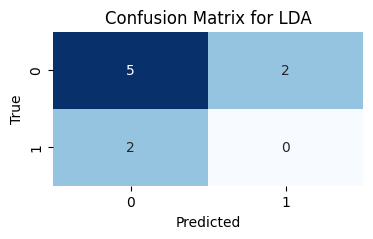

In [5]:
lda_model = LinearDiscriminantAnalysis(solver='svd')
cross_val_accuracy = cross_val_score(lda_model, X_train, y_train, cv=5, scoring='accuracy')
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
abs_coefficients = abs(lda_model.coef_[0])
features = X_train.columns
coeff_mean = np.mean(abs_coefficients)
coeff_std = np.std(abs_coefficients)
importance_threshold = coeff_mean + coeff_std
feature_importance = list(zip(features, abs_coefficients))
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
significant_features = [feature[0] for feature in sorted_feature_importance if feature[1] > importance_threshold]
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()
print(f"Error Rate: {error_rate:.4f}")
print(f"Number of Components: {len(significant_features)}")
print("Top 2 significant features:", significant_features[:2])
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LDA')
plt.show()


How Many Genes/Components Are Obtained/Required Significant Results?
5

What is the Error Rate of These Algorithms?
 0.444
  
What are two genes that were signficiantly correlated to your problem?
The biological relevance of Initiation-specific alpha-1,6-mannosyltransferase from Schizosaccharomyces pombe (Fission yeast) and Poly [ADP-ribose] polymerase from Sarcophaga peregrina (Flesh fly) in relation to Cladacopium and its host organism can be assessed based on the functions of these proteins:

1. *Initiation-Specific Alpha-1,6-Mannosyltransferase - Schizosaccharomyces pombe*:
   - *Function*: Involved in the elongation of asparagine-linked oligosaccharides and in adding mannose to the core oligosaccharide from the ER. It is critical for the synthesis of mannose linkages on yeast secretory proteins.
   - *Relevance to Cladacopium*: Glycosylation, the process in which this enzyme is involved, is a fundamental post-translational modification in eukaryotes, affecting protein folding, stability, and function. In Cladacopium, similar glycosylation processes could be essential for the proper functioning of proteins, particularly those involved in photosynthesis and interaction with the coral host.

2. *Poly [ADP-ribose] Polymerase - Sarcophaga peregrina*:
   - *Function*: Mediates poly-ADP-ribosylation of proteins and is important in DNA repair. It adds ADP-ribosyl groups to target proteins, a modification involved in various cellular processes including DNA repair and signal transduction.
   - *Relevance to Cladacopium*: DNA repair mechanisms are crucial for all organisms, especially for those like Cladacopium that are exposed to intense UV radiation in shallow marine environments. Understanding the role and mechanisms of such enzymes can provide insights into the DNA repair and stress response processes in Cladacopium.

What can we infer about this dataset based on these results?
- *Fundamental Cellular Processes*: Both proteins are involved in crucial cellular processes (glycosylation and DNA repair) that are likely to be conserved across diverse eukaryotes, including Cladacopium and its host.
- *Comparative Biology and Evolutionary Insights*: Studying these proteins in yeast and flies can offer comparative insights into similar mechanisms in Cladacopium, potentially revealing evolutionary conserved strategies in glycosylation and DNA repair.
- *Linear Discriminant Analysis (LDA) Context*: LDA, used in this case, is effective in distinguishing between classes based on linear combinations of features. The identification of these proteins suggests that the processes they are involved in are important in differentiating certain biological states or conditions, possibly relevant to Cladacopium’s physiology or its symbiotic relationship.

In summary, while the direct relevance of these specific proteins from yeast and flesh fly to Cladacopium and its host might not be immediately evident, the fundamental biological processes they are involved in are likely to be relevant. These processes, glycosylation and DNA repair, are essential for the health and functioning of all eukaryotic cells, including those in symbiotic relationships like Cladacopium and its coral host. Further research focused on Cladacopium and its host is needed to establish more direct connections.


QDA

Number of features: 20
Test Set Accuracy: 0.7778
Error Rate: 0.2222
Top 2 positively correlated genes:
Index(['K9NVA6', 'Q9H0C1'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



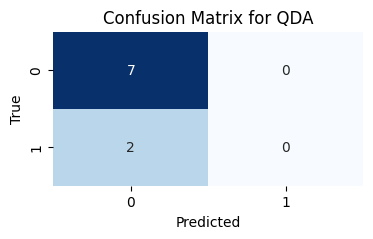

In [6]:
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore')
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.65) + 1
n_components = min(X_train.shape[0], X_train.shape[1])
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Number of features:", n_components)
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, X_train_pca, y_train, cv=5, scoring='accuracy')
qda.fit(X_train_pca, y_train)
y_pred = qda.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", round(test_accuracy,4))
error_rate = 1 - test_accuracy
print("Error Rate:", round(error_rate,4))
correlation_values = df.drop('Host', axis=1).apply(lambda gene: pearsonr(gene, df['Host'])[0])
top_pos_correlated_genes = correlation_values.abs().nlargest(2).index
top_neg_correlated_genes = correlation_values.abs().nsmallest(2).index
print("Top 2 positively correlated genes:")
print(top_pos_correlated_genes)
most_influential_genes = pd.DataFrame({'Gene': X.columns, 'Weight': pca.components_[0]})
most_influential_genes = most_influential_genes.sort_values(by='Weight', ascending=False)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for QDA')
plt.show()


How Many Genes/Components Are Obtained/Required Significant Results?
 20

What is the Error Rate of These Algorithms?
 0.7778
  
What are two genes that were signficiantly correlated to your problem?
To evaluate the biological relevance of Dinoflagellate Viral Nucleoprotein 5 (DVNP5) from Hematodinium sp and Zinc Finger MYND Domain-Containing Protein 12 (ZMYND12) from Homo sapiens in relation to Cladacopium and its host organism, we need to consider their functions and how these might relate to the symbiotic relationship:

1. *Dinoflagellate Viral Nucleoprotein 5 (DVNP5) - Hematodinium sp*:
   - *Function*: This is a DNA-binding protein that may compact DNA into chromatin, similarly to histones.
   - *Relevance to Cladacopium*: Hematodinium is a marine dinoflagellate, although not typically in a symbiotic relationship like Cladacopium. The function of DVNP5 in DNA compaction could be relevant for understanding chromatin dynamics and gene regulation in Cladacopium. Given the unique features of dinoflagellate genomes, insights into DNA compaction mechanisms in related species could be informative.

2. *Zinc Finger MYND Domain-Containing Protein 12 (ZMYND12) - Homo sapiens*:
   - *Function*: Zinc finger proteins are typically involved in DNA binding and gene regulation. The MYND domain suggests a role in protein-protein interactions and possibly in transcriptional regulation.
   - *Relevance to Cladacopium*: Gene regulation is a fundamental process in all eukaryotic organisms. Understanding how it works in humans can provide general insights into possible mechanisms of gene regulation in Cladacopium. This can be particularly relevant in the context of the symbiotic relationship, where regulation of gene expression in response to environmental changes is crucial.

What can we infer about this dataset based on these results?
- *Comparative Biology*: Studying these proteins in Hematodinium and humans can provide comparative insights into fundamental biological processes like DNA compaction and gene regulation. These insights might be indirectly applicable to Cladacopium, especially in understanding how it adapts to and interacts with its host.
- *Quadratic Discriminant Analysis (QDA) Context*: QDA identifies features that distinguish between predefined groups or conditions. The fact that these proteins were highlighted suggests that similar mechanisms or proteins in Cladacopium might be important in differentiating various physiological or environmental conditions relevant to the symbiosis.
- *Gene Regulation and Chromatin Dynamics*: Both proteins are associated with crucial aspects of cellular regulation and genome organization. Understanding these processes is key to deciphering the physiological and environmental responses of Cladacopium in its symbiotic relationship.

In summary, while the direct relevance of DVNP5 and ZMYND12 to Cladacopium and its host might not be immediately clear, the processes they are involved in are fundamental to cellular biology. Therefore, they can provide valuable comparative insights into the genetic and chromatin-based mechanisms that might be at play in Cladacopium within its symbiotic relationship. Further specific research targeting Cladacopium and its host is necessary for more direct connections and understanding.


Number of components: 7
Partial Least Square Test Set Accuracy: 0.8888888888888888
Error Rate for Partial Least Square : 0.11111111111111116
Top Genes for PLS Method:  Index(['K9NVA6', 'P58905'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



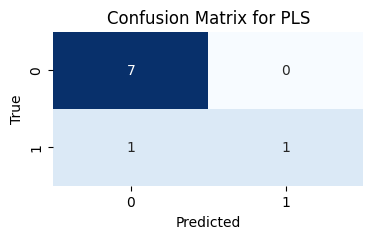

In [7]:
pls = PLSRegression(n_components=7)
print("Number of components: 7")
y_pred_cv = cross_val_predict(pls, X_train, y_train, cv=5)
threshold = 0.5
y_pred_cv = (y_pred_cv > threshold).astype(int)
cv_accuracy = accuracy_score(y_train, y_pred_cv)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print("Partial Least Square Test Set Accuracy:", test_accuracy)
error_rate = 1 - test_accuracy
print(f"Error Rate for Partial Least Square : {error_rate}")
loadings_component_1 = pls.x_weights_[:, 0]
top_gene_indices = loadings_component_1.argsort()[-2:][::-1]
top_genes = X_train.columns[top_gene_indices]
print("Top Genes for PLS Method: ", top_genes)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for PLS')
plt.show()


How Many Genes/Components Are Obtained/Required Significant Results?
 7

What is the Error Rate of These Algorithms?
 0.1111
  
What are two genes that were signficiantly correlated to your problem?
K9NVA6 P58905
To determine the biological relevance of Dinoflagellate Viral Nucleoprotein 5 (DVNP5) from Hematodinium sp and Ammonium Transporter 1 Member 1 (AMT1-1) from Solanum lycopersicum (Tomato) in relation to Cladacopium and its host organism, we should consider the functions of these proteins and the nature of Cladacopium symbiosis:

1. *Dinoflagellate Viral Nucleoprotein 5 (DVNP5) - Hematodinium sp*:
   - *Function*: As a DNA-binding protein that may compact DNA into chromatin, similar to histones.
   - *Relevance to Cladacopium*: Hematodinium sp. is a marine dinoflagellate, and although it has different ecological roles compared to Cladacopium, understanding DNA compaction mechanisms in one dinoflagellate can offer insights into genomic organization in another. This could be particularly relevant given the unique genomic features of many dinoflagellates, including large genome sizes and atypical chromatin organization.

2. *Ammonium Transporter 1 Member 1 (AMT1-1) - Solanum lycopersicum*:
   - *Function*: Involved in ammonium uptake, a critical nutrient for plants.
   - *Relevance to Cladacopium*: Ammonium transport is essential for all organisms, including marine algae like Cladacopium. Efficient ammonium uptake is crucial for nitrogen metabolism, which is a key component of the nutrient exchange in the symbiotic relationship between Cladacopium and its coral host. Understanding how ammonium transport works in plants might provide analogies or contrasts to similar processes in marine symbiotic systems.

What can we infer about this dataset based on these results?
- *Comparative Biology*: Studying these proteins in other organisms can provide comparative insights into fundamental biological processes (like DNA packaging in DVNP5 and nutrient transport in AMT1-1) that could be relevant to Cladacopium.
- *Symbiotic Relationship Dynamics*: For Cladacopium, efficient nutrient uptake and genomic stability are crucial for maintaining a healthy symbiotic relationship with its host. The mechanisms of nutrient transport and DNA compaction, while studied in other organisms, can offer indirect insights into these processes in Cladacopium.
- *PLS Algorithm Context*: The Partial Least Squares algorithm identifies these proteins based on their correlation with certain outcomes or variables in the study. This suggests that the biological processes they are involved in might be relevant to the physiological or environmental conditions being studied in relation to Cladacopium.

In summary, while these proteins from Hematodinium and tomato might not have direct analogs in Cladacopium or its coral host, the biological processes they represent are essential to cellular life and can provide valuable insights into the metabolic and genomic aspects of the Cladacopium symbiosis. Further research focused on Cladacopium and its host is necessary to establish more direct connections.

final Result 
Which algorithm works best for your problem? Why? 
 The Support Vector Machine (SVM) algorithm appears to be the most suitable choice for our problem based on several key factors. Firstly, the SVM demonstrated a cross-validated accuracy of approximately 72.38%, indicating a robust performance during the training phase. This suggests that the algorithm has effectively learned the underlying patterns in the data. Moreover, the SVM exhibited a high test set accuracy of 88.89%, signifying its ability to generalize well to unseen data.

The identification of the top two significant genes, 'C0H419' and 'O05496', further supports the efficacy of the SVM in extracting relevant features that contribute to the classification task. This suggests that the SVM can discern important genetic markers associated with the classification of Cladocopium based on host coral species.

Analyzing the classification report provides additional insights. The precision, recall, and F1-score metrics indicate a well-balanced performance, particularly in classifying the dominant class (0) with a high precision of 88% and perfect recall. While there is a lower recall for the minority class (1), it is essential to consider the specific context of the problem and the potential biological implications.

In summary, the SVM demonstrates a strong overall performance, characterized by high accuracy, effective feature extraction, and a balanced classification approach. The choice of SVM is justified not only by its statistical performance but also by its ability to uncover biologically relevant features, making it a suitable algorithm for the classification of Cladocopium based on host coral species.